# Investigating Airplane Accidents

## Introduction

Accidents are an unfortunate fact of air travel. Although flying is statistically safer than driving, minor and major flying accidents occur daily. In this project, we'll work with a data set of airplane accident statistics to analyze patterns and look for any common threads.

We'll be working with a data set that contains 77,282 aviation accidents that occurred in the U.S., and the metadata associated with them. The data in our **AviationData.txt** file comes from the National Transportation Safety Board (NTSB). You can download the file at [data.gov](http://catalog.data.gov/dataset/aviation-data-and-documentation-from-the-ntsb-accident-database-system-05748/resource/4b1e95fe-91a7-4112-85fa-424d2672a906).

The file isn't in CSV format as it separates the fields with a pipe character (|) instead.

## Columns description

- **Event Id** - The unique id for the incident
- **Investigation Type** - The type of investigation the NTSB conducted
- **Event Date** - The date of the accident
- **Location** - Where the accident occurred
- **Country** - The country where the accident occurred
- **Latitude** - The latitude where the accident occurred
- **Longitude** - The longitude where the accident occurred
- **Injury Severity** - The severity of any injuries
- **Aircraft Damage** - The extent of the damage to the aircraft
- **Aircraft Category** - The type of aircraft
- **Make** - The make of the aircraft
- **Model** - The model of the aircraft
- **Number of Engines** - The number of engines on the plane
- **Air Carrier** - The carrier operating the aircraft
- **Total Fatal Injuries** - The number of fatal injuries
- **Total Serious Injuries** - The number of serious injuries
- **Total Minor Injuries** - The number of minor injuries
- **Total Uninjured** - The number of people who did not sustain injuries
- **Broad Phase of Flight** - The phase of flight during which the accident occurred

## Importing packages and reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = 999

In [2]:
# Approach not using pandas but list of lists
aviation_data = open("my_datasets/AviationData.txt")
aviation_data = aviation_data.read().splitlines()
aviation_list = []
for line in aviation_data:
    splitted_line = line.split(" | ")
    aviation_list.append(splitted_line[:-1])

In [3]:
#Searching LAX94LA336, can be anywhere
lax_code=[]

for row in aviation_list:
    for cell in row:
        if cell == "LAX94LA336":
            lax_code.append(row)

print(lax_code)

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996']]


- Were there any downsides to the approach you just took to search through AviationData.txt?

    - This search is a O(m·n) time consuming algorithm. We need to look at all the rows in the file to find the matches.
    
## Linear Algorithm

As we know **LAX94LA336** is in column 3, we can perform a linear search checking this field instead of the whole row:

In [4]:
#Searching LAX94LA336, in column 3
lax_code=[]

for row in aviation_list:
    if row[2] == "LAX94LA336":
        lax_code.append(row)

print(lax_code)

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996']]


## Logarithmic Algorithm

For a logarithmic algorithm, we should first sort the rows by column 3 (index=2) so that we can perform **binary search**.

In [5]:
def binary_search(target, input_list, target_column):
    sorted_list = input_list.copy()
    sorted_list.sort(key = lambda x: x[target_column])
    
    lower_bound = 0
    upper_bound = len(sorted_list) - 1
    index = (lower_bound+upper_bound)//2
    guess = sorted_list[index][target_column]

    while (guess != target) and (lower_bound <= upper_bound):
        if target < guess:
            upper_bound = index - 1
        elif target > guess:
            lower_bound = index + 1
        index = (lower_bound+upper_bound)//2
        guess = sorted_list[index][target_column]
    if guess == target:
        return sorted_list[index]
    else:
        return -1

lax_code=[]

lax_code.append(binary_search("LAX94LA336", aviation_list, 2))

print(lax_code)

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996']]


The counterparts from linear and logarithmic algorithms are:
- Linear: We must know beforehand in which column we must search
- Logarithmic: The list must be sorted to apply binary search.

## Hash Tables

We can also work with the aviation_list as a list of dictionaries.

In [6]:
aviation_dict_list = []

aviation_list_keys  = aviation_list[0]
aviation_list_values = aviation_list[1:]

for values in aviation_list_values:
    dictionary = dict(zip(aviation_list_keys, values))
    aviation_dict_list.append(dictionary)

In [7]:
# Search through aviation_dict_list for LAX94LA336. This value could be in any key in any dictionary.
lax_dict = []
for entry in aviation_dict_list:
    for key in entry:
        if entry[key] == "LAX94LA336":
            lax_dict.append(entry)
print(lax_dict)

[{'Event Id': '20001218X45447', 'Investigation Type': 'Accident', 'Accident Number': 'LAX94LA336', 'Event Date': '07/19/1962', 'Location': 'BRIDGEPORT, CA', 'Country': 'United States', 'Latitude': '', 'Longitude': '', 'Airport Code': '', 'Airport Name': '', 'Injury Severity': 'Fatal(4)', 'Aircraft Damage': 'Destroyed', 'Aircraft Category': '', 'Registration Number': 'N5069P', 'Make': 'PIPER', 'Model': 'PA24-180', 'Amateur Built': 'No', 'Number of Engines': '1', 'Engine Type': 'Reciprocating', 'FAR Description': '', 'Schedule': '', 'Purpose of Flight': 'Personal', 'Air Carrier': '', 'Total Fatal Injuries': '4', 'Total Serious Injuries': '0', 'Total Minor Injuries': '0', 'Total Uninjured': '0', 'Weather Condition': 'UNK', 'Broad Phase of Flight': 'UNKNOWN', 'Report Status': 'Probable Cause', 'Publication Date': '09/19/1996'}]


- Was it harder or easier to search through a list of dictionaries than a list of lists? 
    - It's a bit more complex, as we must first convert the list to dictionaries and later iterate considering keys. 
    
## Accidents by U.S. State

We'll count how many accidents occurred in each U.S. state, then determine which state had the most accidents overall.

In [8]:
state_accidents = {}

for entry in aviation_dict_list:
    state = entry["Location"]
    if state in state_accidents:
        state_accidents[state] += 1
    else:
        state_accidents[state] = 1

most_accidented_state = max(state_accidents, key=state_accidents.get)
print(most_accidented_state)

ANCHORAGE, AK


## Fatalities and Injuries by Month

We can also count how many fatalities and serious injuries occurred during each month.

In [16]:
monthly_injuries = {}

for line in aviation_dict_list:
    month = line["Event Date"].split("/")[0]
    if month == "":
        continue
    fatal_inj = int(line["Total Fatal Injuries"].replace("","0"))
    serious_inj = int(line["Total Serious Injuries"].replace("","0"))
    total_inj = fatal_inj + serious_inj
    if month in monthly_injuries:
        monthly_injuries[month] += total_inj
    else:
        monthly_injuries[month] = total_inj

print(monthly_injuries)

{'09': 723990, '08': 962040, '07': 1251730, '06': 587410, '05': 773150, '04': 477880, '03': 359270, '02': 583570, '01': 337440, '12': 911470, '11': 997650, '10': 719620}


In [17]:
monthly_injuries_series = pd.Series(monthly_injuries).sort_values(ascending=False)
monthly_injuries_series

07    1251730
11     997650
08     962040
12     911470
05     773150
09     723990
10     719620
06     587410
02     583570
04     477880
03     359270
01     337440
dtype: int64

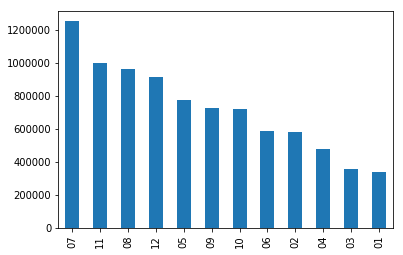

In [19]:
monthly_injuries_series.plot.bar()